## importing required libraries

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

## loading datset and defining the model

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=1)
# define the model
model = LinearRegression()
LinearRegression()
# we have chosen the Linear Regression model

LinearRegression()

## calculating bias and variance 

In [3]:
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=400, random_seed=1)
# summarize results

print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

Bias: 20.803
Variance: 0.621


## feature selection

Feature 0: 89.149227
Feature 1: 74.777611
Feature 2: 153.155127
Feature 3: 16.017253
Feature 4: 112.049260
Feature 5: 470.189277
Feature 6: 83.424428
Feature 7: 33.647797
Feature 8: 85.648217
Feature 9: 141.010467
Feature 10: 174.906875
Feature 11: 62.781011
Feature 12: 599.629263


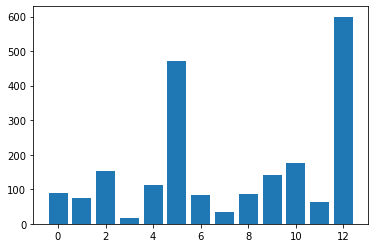

In [4]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select 9 features
	fs = SelectKBest(score_func=f_regression, k=9)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#we have chosen 9 features

## calculating bias and variance using selected features

In [5]:
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train_fs, y_train, X_test_fs, y_test, loss='mse', num_rounds=400, random_seed=1)
# summarize results

print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

Bias: 2.967
Variance: 0.328


In [6]:
# it is evident that bias and variance has decreased.